In [8]:
from IPython.display import Image
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# keras==2.3.1
#from keras.models import Sequential
#from keras.layers import Dense

### Neural Networks

#### **A. What are neural networks?**

Their name and structure are inspired by the human brain, mimicking the way that bilogical neurons signal to one another. 

In [52]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png')

A biological neuron is the basic unit of the human brain, which transmits information to other nerve cells, muscles, etc. This is done through a network with billions of connected neurons. Neurons take some inputs (through dendrites), process them, and procides outputs (through axons). If the combination of input signals is a bove a certain threshold, it results in firing or activation of the neuron. The same principle is used in artificial neurons as well. 

#### a) How do NNs work? 
https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9 <br> https://medium.com/swlh/artificial-neural-networks-for-absolute-beginners-a75bc1522e1d  <br> https://towardsdatascience.com/neural-networks-for-beginners-by-beginners-6bfc002e13a2 <br> https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0
- Neuron

The basic unit of a neural network is called **neuron**, which is a computational unit. A neuron takes inputs (variables), does some maths with them and produces an output. 
Here's what a 2-input neuron looks like:

<img src="images/2-input-neuron.png" width="400" height="200">

There are 3 things happening in this computational unit: <br>
1. Each input is multiplied by a randomly assigned weight: <br>
$x1 -> x1*w1$ <br> $x2 -> x2*w2$
2. All the weighted inputs are added together with a bias b: <br>
$(x1*w1)+(x2*w2)+b$
3. The sum is passed through **an activation function** (depends on the type of predcition required by a model): <br>
$y = f(x1*w1+x2*w2+b)$

A commonly used **activation function** is the sigmoid function:  $\large S(y) = \frac{1}{1+e^-y}$

<img src="images/sigmoid-func.png" width="400" height="200">

The sigmoid function only outputs numbers in the range (0,1). It is compressing $(-\infty,\infty)$  to (0,1). Big -ve numbers become ~0, and big positive numbers become ~1. It is especially sued for models where we have to predict the probability as an output.

**Ex 1: Estimating the output using the sigmoid function**

In [16]:
w = np.array([0,1]) # w1 and w2
x = np.array([2,3]) # x1 and x2
b = 4 # bias

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, w, bias):
        self.weights = w
        self.bias = b

    def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
n = Neuron(w,b)
sig_y = n.feedforward(x)
print(f'The results from the sigmoid function is {sig_y}')

The results from the sigmoid function is 0.9990889488055994


**Why is sigmoid function used widely for classification?**

- Imaging we need to predict if it would be a rainy day (0) or a sunny day (1) or whether the input image is of an animal(0) or a bird (1)

<img src="images/perceptron.png" width="400" height="200">

- In fact, this is called a **perceptron** - a single layer neural network used for binary classification

- if we use a step function then we only get 2 possible answers 0 and 1 based on a threshold
- if the output is 1, the neuron is considered fired or activated, else not

<img src="images/step-func.png" width="400" height="200">

- what if there are more than 1 classes in our classification problem? Then we hit the problem of having > 1 activated classes
- this is the reason we'd use a sigmoid function because it goes from 0 to 1 and if more than 1 neuron activates, you could find which neuron has the “highest activation” based on probabilities

- Neural Network 

A neural network is nothing more than a bunch of neurons connected together in **layers**.

<img src="images/neural-network.png" width="600" height="400">

There are 3 types of layers:
1. **Input Layer** - used to feed the input, e.g. - if the input consists of 2 variables (e.g: weight and height), the input layer will have 2 **nodes** 
2. **Output Layer** - if a classification model's job is to predict between 5 classes, this layer will contain 5 **nodes**
3. **Hidden Layer** - the layers between the input and output layers. If they are 2 or more, it is called a **Deep Neural Network**

#### Cost Functions and Gradient Descent

- In order for the netowrk to be able to learn and produce results each layer has to implement two functions  - **forward propagation** (from the input layer we get to the output layer) and **backward propagation** (move from output to input layer)
- Differences based on what happens inside of these methods
- **Forward propagation** is only responsible for running the input through a function and return the result. No learning, only calculations;
- **Backward propagation** is to help us minimize the cost function or the differences between the predictions and the actual values
    - updates the parameters of the layer in order to improve the accuracy of the forward propagation
    - implement the derivative (gradient descent) of the forward propagation and return the result
- **How to minimize the errors?**
- We need an optimization algorithm - there are many kinds of optimizers but we will see the most widely used one - Gradient Descent

<img src="images/gradient-descent.png" width="700" height="500">

- **How does the process work?**
- In the first iteration we assign random weights to our input values
- In every other iteration the backward propagation helps us change the weights by applying the first derivative to the forward propagation function
- the gradient descent (1st derivative) gives us the best weights so we can reach the global minimum of a function at which the errors are minimized
- **How fast do the parameters update? Or how quickly we are reaching a global minimum?**
- This is what we call a learning rate and has to be passed to the model before we run it

<img src="images/learning-rate.jpg" width="400" height="200">

- if we choose a learning rate that is too big the parameters will change quickly and we might skip the minimum or the point at which the errors are the smallest
- if we choose a learning rate that is too small, it will take much time and hence computng power to reach a good result
- start with a learning rate of 0.1 or 0.01 and do hyperparameter tuning from there on

#### b) Types of Neural Networks
https://www.simplilearn.com/tutorials/deep-learning-tutorial/neural-network <br> https://pub.towardsai.net/main-types-of-neural-networks-and-its-applications-tutorial-734480d7ec8e <br> https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464 <br> https://analyticsindiamag.com/6-types-of-artificial-neural-networks-currently-being-used-in-todays-technology/

<img src="images/nn-types.png" width="600" height="400">

<img src="images/rnn.png" width="400" height="200">

- variation of feed-forward networks (the data travels in one direction only input to output)
- each of the neurons in hidden layers receives an input with a specific delay in time - one or more iterations
- we use it when we need to access previous information in current iterations
- the hidden layer saves its output to be used for future prediction
- the output becomes part of its new input
- Ex: when we are trying to predict the next word in a sentence, we need to know the previously used words
- Applications:
    - Machine translation
    - robot control
    - time series prediction
    - speech recognition
    - time series anomaly detection
- Downside: 
    - slow computational speed
    - it cannot remember infrom from a long time ago

<img src="images/lstm.png" width="400" height="200">

- introduces a memory cell - a special cell to process data when data have time gaps
- if our RNN fails when we have a large number of relevant data then LSTM is the way to go
- as opposed to RNN it can remember data from a long time ago
- Applications:
    - speech recognition
    - writing recognition

<img src="images/ae.png" width="300" height="100">

- unsupervised machine learning algorithm
- the number of hidden cells is smaller than the input cells
- the number of input cells equals to the number of output cells
- AE requires the output to be as close as possible to the input and forces AE to search for common patterns
- works witn ecnoders to convert input data into smaller dimensions and decoders to reconstruct the compressed data
- Applications:
    - classification
    - clustering
    - feature compresion

<img src="images/dcn.png" width="400" height="200">

- convolutional cells that process the input features into batches 
- this allows the network to remember an image in parts
- Applications:
    - identify faces, street signs, tumors
    - image recognition
    - video analysis
    - anomaly detection
    - drug recognition
    - time series forecasting

<img src="images/ff.png" width="300" height="100">

- the simplest form - the data travels in one direction only - input to output
- almost all vision and speech recognition applications use some form of this type of neural network

<img src="images/rbf.png" width="400" height="200">

- classifies the data point based on its distance from a center point
- if there is no training data, for example, we will group things into clusters and create a center point
- the network looks for data points that are similar to each other and groups them
- applied to power restoration systems

#### c) Application to different industries

https://blog.statsbot.co/neural-networks-for-beginners-d99f2235efca

**Marketing**
- market segmentation
- unsupervised neural networks used to automatically group and segment customers based on similarities
- supervised nn - trained to learn the boundaries between customer segments based on a group og customers

**Retail and Sales**
- forecasting of sales

**Banking and Finance**
- derivative securities pricing and hedging
- future prices forecasting
- exchange rates forecasting
- stock performance

**Medicine**
- a trending research area believed that it willr eceive an extensive application to biomedical systems in the next years
- research is mostly on modeling parts of the human body and recognizing diseases from various scans

#### **B. Build and train a neural network model using Keras**
data: https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view <br> https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/ <br>
**Objective:** to predict whether house prices are above or below median value <br>

**Input Features:**
- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

**Target:**
- Is the house price above the median or not? (1 for yes and 0 for no)

#### Data Prep

In [11]:
df = pd.read_csv('housepricedata.csv')
df[:3]

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1


In [12]:
# convert our dataset into arrays
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [15]:
# split the dataset into our input features and the label we wish to predict

X = dataset[:,0:10]
Y = dataset[:,10]

# normalize the data between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)

#### Building a neural network model
https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/
-  think about its architecture
- a dense neural network - the dense layer (a regular nn layer)
    - A linear operation on the weighted input vectors 
    - is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [20]:
# sequential is saying that we will describe our model sequentially layer by layer
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(10,))) # first layer with 32 neurons and input shape = 10 since we've got 10 features, activation function=relu - any negative inputs turns the y value into 0 
model.add(Dense(32, activation='relu')) # keras infer the input shape from the output of our first layer
model.add(Dense(1, activation='sigmoid')) # 1 neuron and sigmoid activation

<img src="images/relu.png" width="600" height="400">


#### Model configuration
- Tell the model which algorithm you want to use to do the optimization
- tell the model what loss function to use
- tell the model what other metrics you want to track apart from the loss function

In [21]:
model.compile(optimizer='sgd', # stochastic gradient descent for optimizing the cost function
              loss='binary_crossentropy', # the loss function for outputs that take the values 1 or 0
              metrics=['accuracy']) # track accuracy on top of the loss function

#### Model Training
- batch_size - the number of samples taken sequentially for training the data
- epochs - when an ENTIRE dataset is passed forward and backward through the neural network only ONCE assuming all batches have been trained
- validation data - the model will tell us how well we are doing on the validation data

In [22]:
hist = model.fit(X_train, Y_train,
                  batch_size=32, epochs=100,
                  validation_data=(X_test, Y_test))

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 0.7346 - accuracy: 0.4894 - val_loss: 0.6986 - val_accuracy: 0.5114
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.4855 - val_loss: 0.6828 - val_accuracy: 0.5616
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5574 - val_loss: 0.6730 - val_accuracy: 0.6370
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.6167 - val_loss: 0.6643 - val_accuracy: 0.6986
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.6922 - val_loss: 0.6562 - val_accuracy: 0.7603
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.7668 - val_loss: 0.6488 - val_accuracy: 0.7740
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.7777 - val_loss: 0.6418 - val_accuracy: 0.7831
Epoch 8/100


### Model evaluation
- 90% of the samples are predicted correctly
- binary crossentropy gives values between 0 and 1 - the smaller the values the better 

In [25]:
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8995


[0.273267537355423, 0.8995434045791626]

### Visualizing Loss and Accuracy

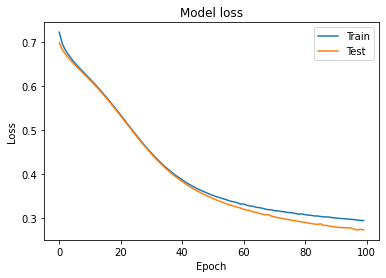

In [32]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

- For the test data the bigger the epoc the smaller the losses

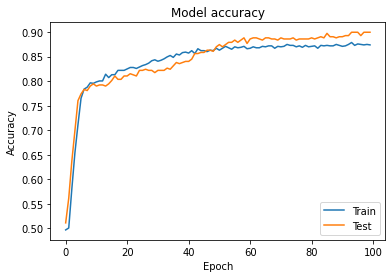

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

- the greater the number of epocs the better the accuracy
- up epoc 50 there is a chance of overfitting - the model doesn't rpedict as well as it fits the training data

#### Train a model that overfits

In [41]:
model_2 = Sequential()
model_2.add(Dense(1000, activation='relu', input_shape=(10,)))
model_2.add(Dense(1000, activation='relu'))
model_2.add(Dense(1000, activation='relu'))
model_2.add(Dense(1000, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
    
model_2.compile(optimizer='adam', # adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, Y_test))

Epoch 1/100
32/32 [==============================] - 2s 51ms/step - loss: 0.5499 - accuracy: 0.6986 - val_loss: 0.3433 - val_accuracy: 0.8562
Epoch 2/100
32/32 [==============================] - 1s 45ms/step - loss: 0.3436 - accuracy: 0.8641 - val_loss: 0.2871 - val_accuracy: 0.8744
Epoch 3/100
32/32 [==============================] - 1s 45ms/step - loss: 0.3141 - accuracy: 0.8681 - val_loss: 0.2860 - val_accuracy: 0.8927
Epoch 4/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3019 - accuracy: 0.8826 - val_loss: 0.2299 - val_accuracy: 0.9064
Epoch 5/100
32/32 [==============================] - 1s 43ms/step - loss: 0.2934 - accuracy: 0.8734 - val_loss: 0.2991 - val_accuracy: 0.8562
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2617 - accuracy: 0.8928 - val_loss: 0.2649 - val_accuracy: 0.9087
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2485 - accuracy: 0.9137 - val_loss: 0.3612 - val_accuracy: 0.8447
Epoch 

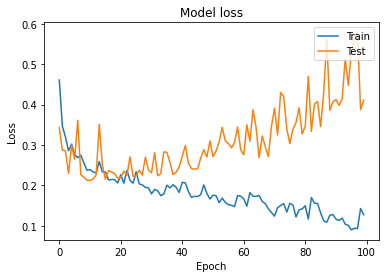

In [42]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

- a clear sign of over-fitting - our modl is too dependent on the training dataset
- the training loss is decreasing but the test loss is higher and inreasing

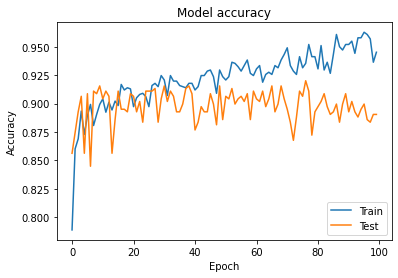

In [45]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

#### Add a regulatization to address the over-fitting
https://www.machinecurve.com/index.php/2019/12/16/what-is-dropout-reduce-overfitting-in-your-neural-networks/#what-is-dropout-and-how-does-it-work <br> https://towardsdatascience.com/impact-of-regularization-on-deep-neural-networks-1306c839d923

- **kernel-regularization** - penalizes the weights (int he cost function) which are very large causing the network to overfit, after applying kernel_regularizer the weights will become smaller
- L2 loss is defined as $w^2$
- The gradient of L2 will be: 2w - Thus, for each gradient update with a learning rate a, in L2 loss, the weights will be subtracted by  aW
- **drop out** - based ona  probability drop out neurons from the original network so they cannot contribute to the learning process
- assign ‘p’ to represent the probability of a neuron, in the hidden layer, being excluded from the network


In [46]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [47]:
model_3 = Sequential([
    # the squared values of w in our overall loss function, and weight them by a weighting parameter 0.01
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    # the neurons in the previous layer has a probability of 0.3 in dropping out during training
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [48]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, Y_test))

Epoch 1/100
32/32 [==============================] - 3s 81ms/step - loss: 21.1273 - accuracy: 0.5331 - val_loss: 3.8819 - val_accuracy: 0.7740
Epoch 2/100
32/32 [==============================] - 2s 76ms/step - loss: 2.4875 - accuracy: 0.8378 - val_loss: 0.6749 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 73ms/step - loss: 0.6120 - accuracy: 0.8623 - val_loss: 0.4995 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 2s 74ms/step - loss: 0.5205 - accuracy: 0.8704 - val_loss: 0.5328 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 2s 75ms/step - loss: 0.5158 - accuracy: 0.8651 - val_loss: 0.4491 - val_accuracy: 0.8973
Epoch 6/100
32/32 [==============================] - 2s 74ms/step - loss: 0.4949 - accuracy: 0.8584 - val_loss: 0.5907 - val_accuracy: 0.8014
Epoch 7/100
32/32 [==============================] - 2s 77ms/step - loss: 0.5251 - accuracy: 0.8395 - val_loss: 0.4575 - val_accuracy: 0.8813
Epoch

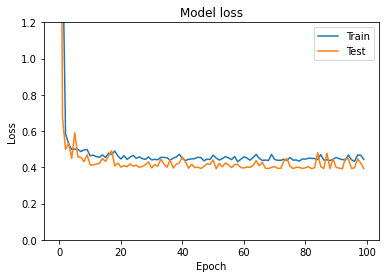

In [49]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

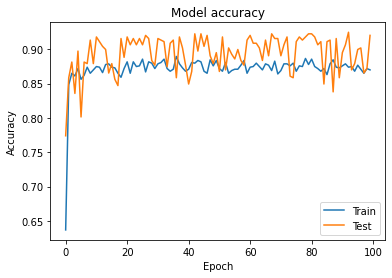

In [51]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

- there is less overfitting